# Demostración de Trabajo con Archivos BSP

In [1]:
%matplotlib inline

from bsp.core import load_study
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [14, 8]

## ¿Cómo se carga un estudio?

In [2]:
study = load_study("data/prueba2.bsp")
study

## ¿Cómo se recorren las pruebas?

In [3]:
print(f"El estudio tiene {len(study)} pruebas")
print()
for index, test in enumerate(study):
    print(index, test)

El estudio tiene 3 pruebas

0 HorizontalCalibration at 30°
1 HorizontalPursuit at 30°
2 HorizontalCalibration at 30°


## ¿Cómo obtengo una prueba en específico?

In [4]:
pursuit = study[1]

In [5]:
pursuit.hor_stimuli

array([-24.192   , -24.191902, -24.191803, ..., -24.57535 , -24.57535 ,
       -24.57535 ], dtype=float32)

Esta prueba tiene 40000 muestras


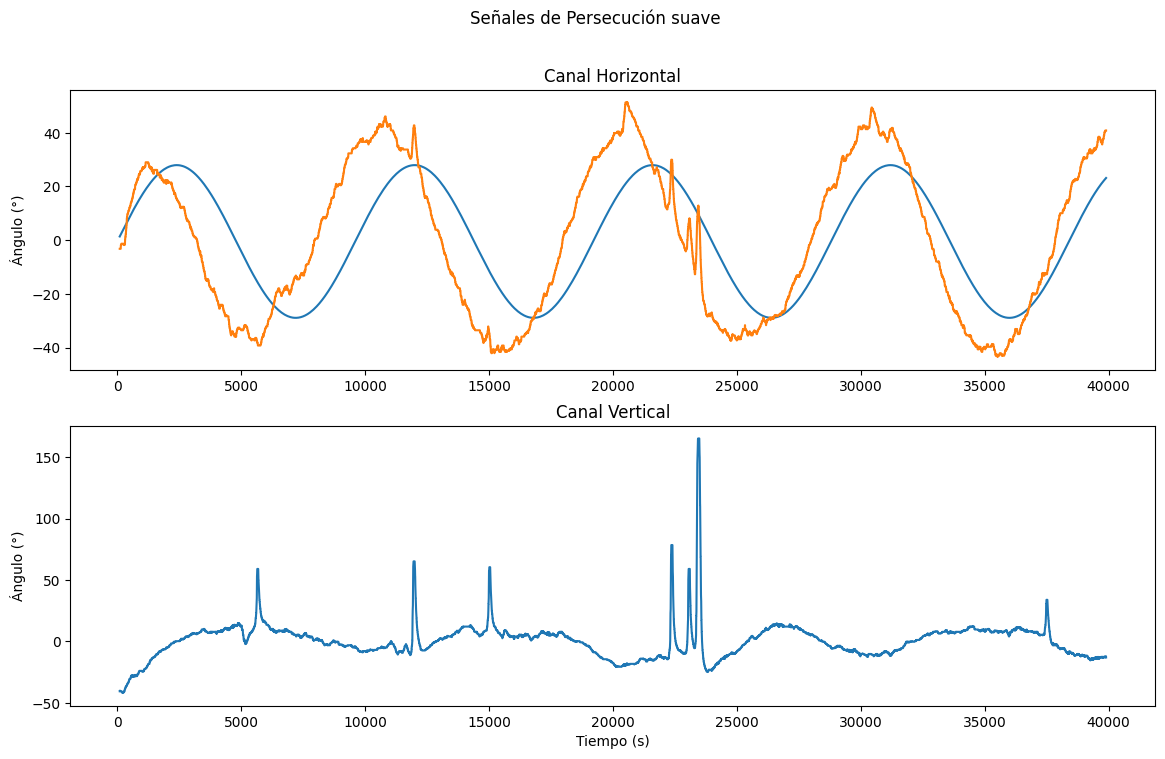

In [17]:
samples_to_remove = 100
samples = len(pursuit.hor_stimuli)
time = np.arange(samples)
time = time[samples_to_remove:-samples_to_remove]
print("Esta prueba tiene " + str(samples)  + " muestras")

horizontal = pursuit.hor_channel.copy()[samples_to_remove:-samples_to_remove] * -1
amplitude = horizontal.max() - horizontal.min()

stimuli = pursuit.hor_stimuli.copy()[samples_to_remove:-samples_to_remove]
stimuli -= stimuli.mean()
stimuli *= (amplitude * 2)

plt.suptitle("Señales de Persecución suave")

plt.subplot(211)
plt.title("Canal Horizontal")
plt.plot(time, stimuli)
plt.plot(time, horizontal)
plt.ylabel("Ángulo (°)")

plt.subplot(212)
plt.title("Canal Vertical")
plt.plot(time, pursuit.ver_channel[samples_to_remove:-samples_to_remove])
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")

plt.savefig("prueba.png")

## Ploteando la velocidad

0.9882002020601051
1.8166218308645559


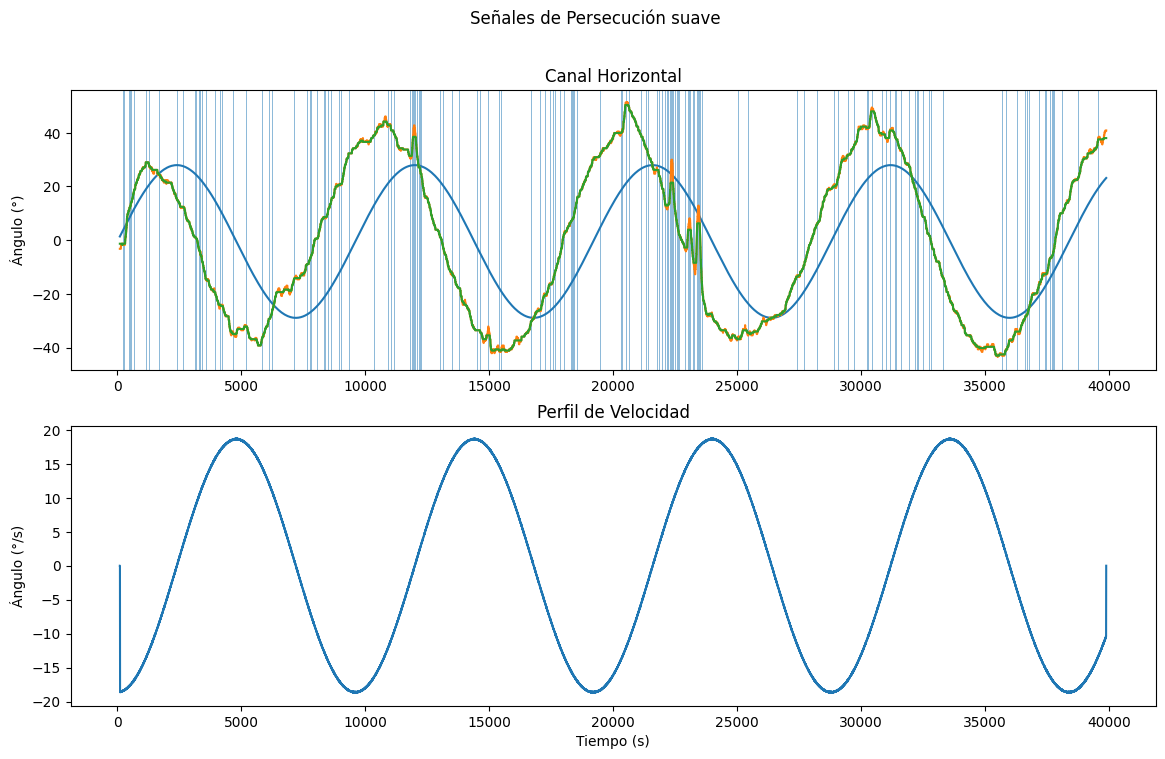

In [31]:
from bsp.core import differentiate, denoise, impulses
from scipy.signal import medfilt

horizontal_filtered = medfilt(horizontal, 201)
velocities = differentiate(horizontal_filtered)

stimuli_velocities = differentiate(stimuli)

plt.suptitle("Señales de Persecución suave")

plt.subplot(211)
plt.title("Canal Horizontal")
plt.plot(time, stimuli)
plt.plot(time, horizontal)
plt.plot(time, horizontal_filtered)
plt.ylabel("Ángulo (°)")

for start, end in impulses(horizontal):
    if end - start < 15:
        continue
        
    plt.axvspan(start, end, alpha=0.5)

plt.subplot(212)
plt.title("Perfil de Velocidad")
plt.plot(time, stimuli_velocities)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°/s)")


plt.savefig("velocities.png")

velocidad_media_estimulo = abs(stimuli_velocities.mean())
velocidad_media_persecucion = abs(velocities.mean())
ganancia = velocidad_media_movimiento / velocidad_media_estimulo

print(velocidad_media_persecucion)
print(ganancia)

def join_close(pairs: list[tuple[int, int]], threshold: int = 5) -> list[tuple[int, int]]:
    pass

entrada = [
    (3, 5),
    (9, 12),
    (13, 25),
    (40, 42),
    (50, 56),
]

salida = [
    (3, 25),
    (40, 42),
    (50, 56),
]





## Biomarcadores de Persecución Suave

Alison tiene que hacer una función que dados los impulsos (lista de pares (start, end)) devuelva otra lista con los pares que estén cercanos unidos.

In [32]:
# Biomarcador 1
def pursuit_position_mse_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> float:
    pass

# Biomarcador 2
def pursuit_latency_mse_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> float:
    pass

# Biomarcador 3
def pursuit_microsaccades_count_biomarker(channel: np.ndarray) -> int:
    pass

# Biomarcador 4
def pursuit_mean_velocity_biomarker(channel: np.ndarray) -> float:
    pass

# Biomarcador 5
def pursuit_mean_velocity_gain_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> float:
    pass

# Biomarcador 6
def pursuit_spectral_difference_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> float:
    pass

## Biomarcadores de Antisácadas

In [ ]:
from enum import Enum

class Direction(Enum):
    Left = "left"
    Right = "right"

def saccades(channel: np.ndarray, stimuli: np.ndarray) -> list[tuple[int, int]]:
    pass

def antisaccades(channel: np.ndarray, stimuli: np.ndarray) -> list[tuple[int, int]]:
    pass

def direction(channel: np.ndarray, stimuli: np.ndarray, start: int, end: int) -> Direction:
    pass
    
# Biomarcador 1
def antisaccade_latencies_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> list[float]:
    pass

# Biomarcador 2
def antisaccade_response_inhibition_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> float:
    pass

# Biomarcador 3
def antisaccade_location_memory_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> list[float]:
    pass

# Biomarcador 4
def antisaccade_velocities_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> list[float]:
    pass

# Biomarcador 5
def antisaccade_durations_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> list[float]:
    pass

# Biomarcador 6
def antisaccade_correction_latencies_biomarker(channel: np.ndarray, stimuli: np.ndarray) -> list[float]:
    pass
